<a href="https://colab.research.google.com/github/rahul-727/DL-Lab-work/blob/main/2348544_Lab3_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Program 1

In [2]:
def rev(w):

  return 0.5 * w**2 - 30 * w + 100

def m(f, w_init, l_rate, moment, numiteration):

  w = w_init
  v = 0
  w_previous = [w]
  for _ in range(numiteration):
    g = f(w)

    v = moment * v - l_rate * g

    w += v

    w_previous.append(w)

  return w_previous

w_init = 20
l_rate = 0.1
moment = 0.9
numiteration = 3

w_previous = m(rev, w_init, l_rate, moment, numiteration)

print("no of iteration")
for i, w in enumerate(w_previous):
  print(f"{i+1}\t\t${w:.2f}")

cost = w_previous[-1]
print(f"cost needed for makreting: ${cost:.2f}")



no of iteration
1		$20.00
2		$50.00
3		$92.00
4		$-27.40
cost needed for makreting: $-27.40


Program 2

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

In [3]:
heart = pd.read_csv('/content/Heart_Disease_Prediction.csv')

In [4]:
heart.shape

(270, 14)

In [5]:
heart.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


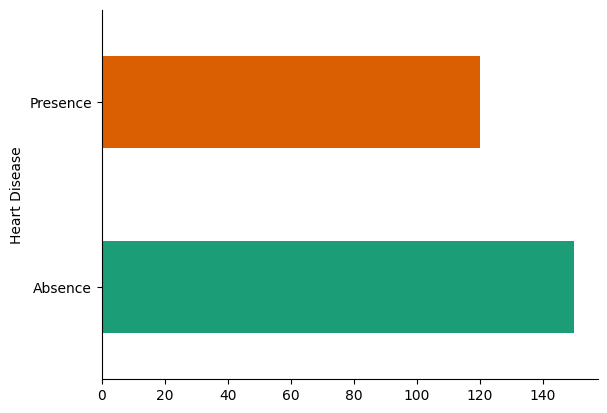

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
heart.groupby('Heart Disease').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

this plot shows us the no.of people iwth and without the heart disease

In [7]:
heart.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [8]:
heart.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [9]:
numerical_columns = heart.select_dtypes(include=['int', 'float']).columns
categorical_columns = heart.select_dtypes(include=['object']).columns

print("numerical columns:")
print(numerical_columns)
print("categorical columns:")
print(categorical_columns)

numerical columns:
Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium'],
      dtype='object')
categorical columns:
Index(['Heart Disease'], dtype='object')


one hot encoding

In [10]:
heartnew = pd.get_dummies(heart, drop_first=True)
print(heartnew.head())

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium  Heart Disease_Presence  
0                        3         3                       1  
1                        0         7                       0  

here i am changing that one categorical column whcih i mentioned above into a numerical column with 0 and 1 using one hot encoding

now the 0s represent the absence of the disease and the 1s represent the presence of the disease.

In [11]:
heartnew.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease_Presence'],
      dtype='object')

the new dataset is named as heartnew

In [12]:
X = heartnew.drop(columns=['Heart Disease_Presence'])
y = heartnew['Heart Disease_Presence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

spliiting the new dataset into train and test. in 80/20 format

In [13]:
regularization_types = ['L1', 'L2', 'ElasticNet']
regularization_strengths = [0.1, 0.01, 0.001]

for reg_type, reg_strength in zip(regularization_types, regularization_strengths):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(reg_strength)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=0)



here we are doing 3 types of regularixation techniques. l1,l2 and elastic

In [14]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
auc = roc_auc_score(y_test, model.predict(X_test))


2/2 [==============================] - 0s 7ms/step


In [15]:
print(f"{reg_type} Regularization Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:", cm)
print("AUC:", auc)

ElasticNet Regularization Results:
Accuracy: 0.7592592592592593
Precision: 0.7222222222222222
Recall: 0.6190476190476191
F1 Score: 0.6666666666666666
Confusion Matrix: [[28  5]
 [ 8 13]]
AUC: 0.823953823953824


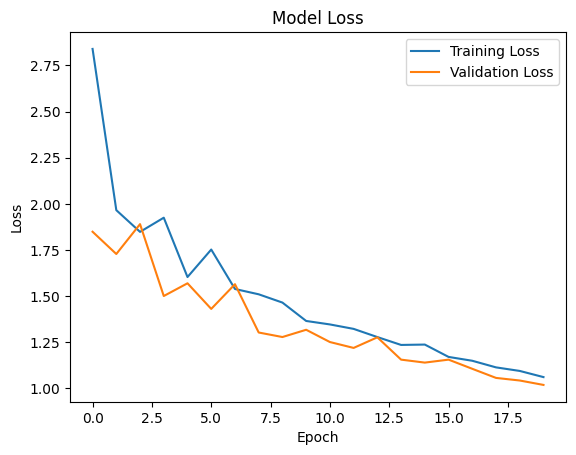

In [16]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

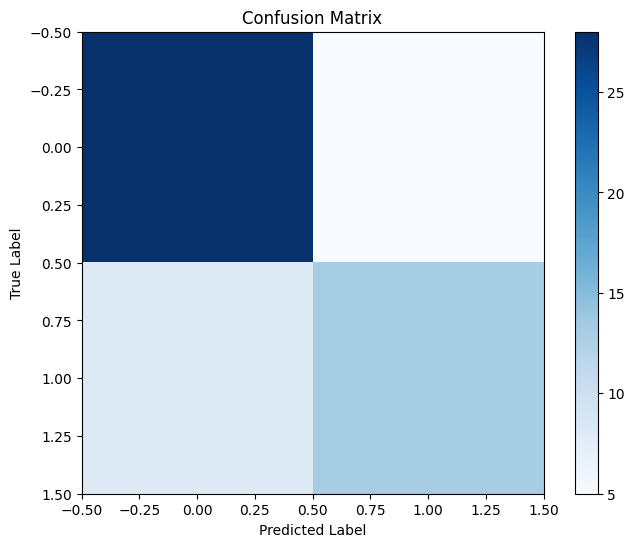

In [17]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

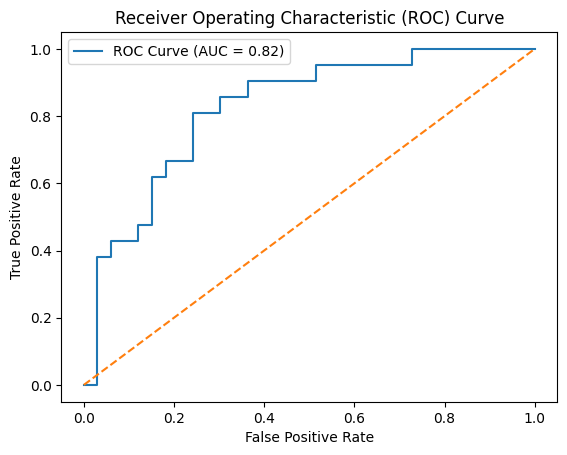

In [18]:
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()